**1. Imports libs**

In [16]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TF", tf.__version__)
print("NP", np.__version__)


TF 2.0.0-rc1
NP 1.18.4


**2. Ready to MNIST Dataset**

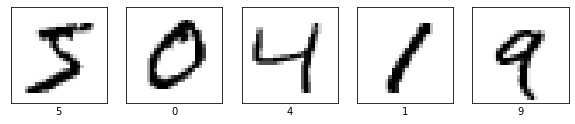

Shape of input_data: (60000, 28, 28)
Shape of labeled_data: (60000,)
Shape of input_test_data: (10000, 28, 28)
Shape of labeled_test_data: (10000,)


In [17]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

print("Shape of input_data: {}".format(x_train.shape))
print("Shape of labeled_data: {}".format(y_train.shape))

print("Shape of input_test_data: {}".format(x_test.shape))
print("Shape of labeled_test_data: {}".format(y_test.shape))

In [83]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(
    512,
    input_shape=(28*28, ),
    use_bias=True,
    kernel_initializer='glorot_normal',
    bias_initializer='glorot_normal',
    activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(
    512,
    use_bias=True,
    kernel_initializer='glorot_normal',
    bias_initializer='glorot_normal',
    activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(
    512,
    use_bias=True,
    kernel_initializer='glorot_normal',
    bias_initializer='glorot_normal',
    activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(
    512,
    use_bias=True,
    kernel_initializer='glorot_normal',
    bias_initializer='glorot_normal',
    activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(
    10,
    use_bias=True,
    kernel_initializer='glorot_normal',
    bias_initializer='glorot_normal',
    activation='softmax')) # 마지막 액티베이션 함수!!!
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)             

In [86]:
model.compile(
    # optimizer=tf.optimizers.SGD(learning_rate=0.01),
    optimizer=tf.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

model.fit(
    x=x_train,
    y=y_train,
    batch_size=100,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.1490 - sparse_categorical_accuracy: 0.9586 - val_loss: 0.0992 - val_sparse_categorical_accuracy: 0.9694
Epoch 2/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.1171 - sparse_categorical_accuracy: 0.9674 - val_loss: 0.0828 - val_sparse_categorical_accuracy: 0.9761
Epoch 3/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.0979 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.0787 - val_sparse_categorical_accuracy: 0.9777
Epoch 4/10
60000/60000 [==============================] - 14s 229us/sample - loss: 0.0806 - sparse_categorical_accuracy: 0.9767 - val_loss: 0.0843 - val_sparse_categorical_accuracy: 0.9772
Epoch 5/10
60000/60000 [==============================] - 14s 229us/sample - loss: 0.0737 - sparse_categorical_accuracy: 0.9782 - val_loss: 0.0757 - val_sparse_categorical_accuracy: 0.9792
Epoch

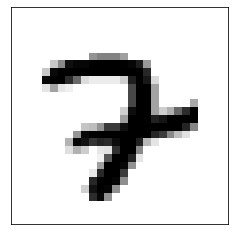

pred: 7, actual: 7


In [90]:
import random

predictions = model.predict(x_test)
r = random.randint(0, len(predictions)-1)

plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_test[r], cmap=plt.cm.binary)
plt.show()

print("pred: {}, actual: {}".format(np.argmax(predictions[r]), y_test[r]))